Mushroom Project

Problem Statement:

Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Thus, in this project, we have to predict the "Class" column. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.shape

(8124, 23)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE=LabelEncoder()

In [15]:
for columns in df:
    
    df[columns]=LE.fit_transform(df[columns])

In [16]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [17]:
df=df.drop(['veil-type'],axis=1)

In [18]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [19]:
#target Variable

In [20]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

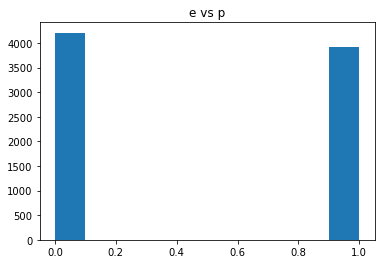

In [21]:
df['class'].hist(grid=False)
plt.title('e vs p')
plt.show()

In [22]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [23]:
corr=df.corr()
corr.shape

(22, 22)

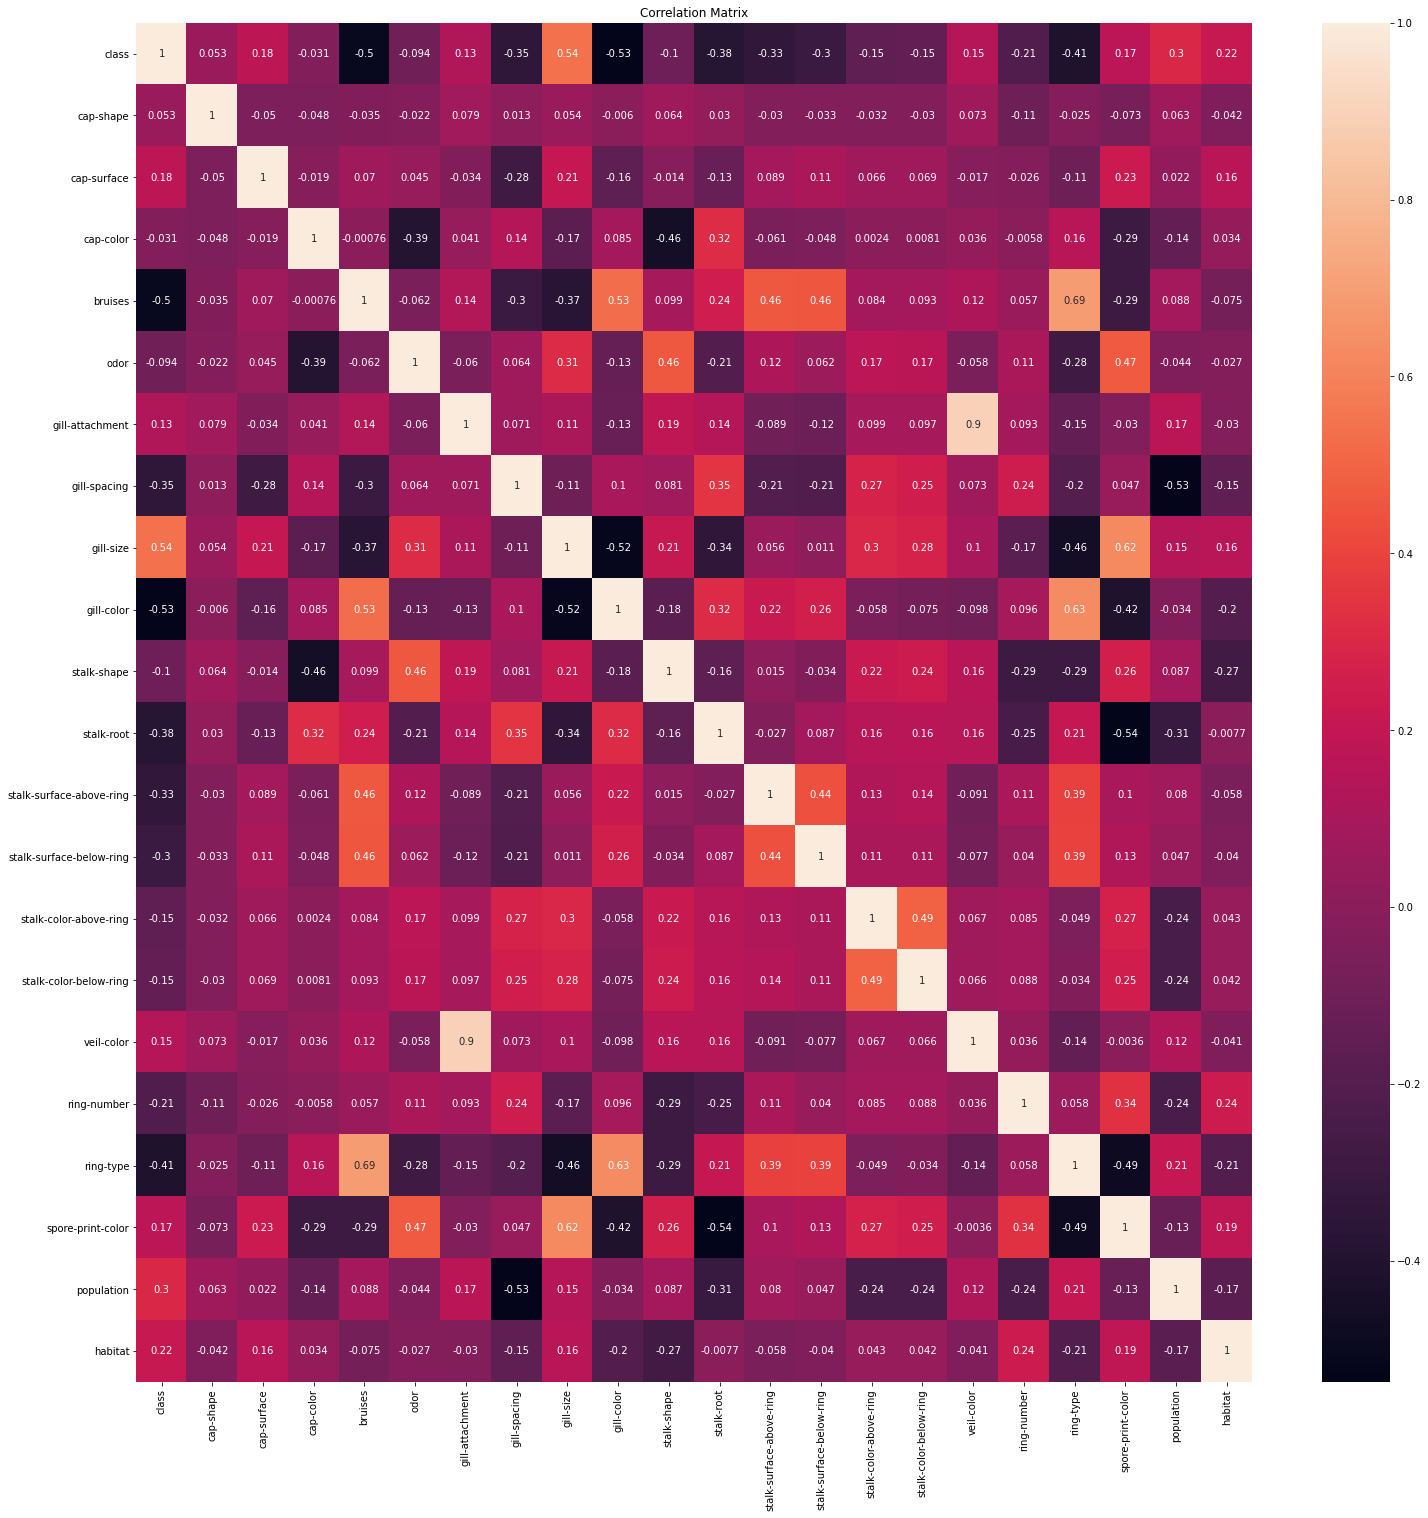

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [25]:
corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

In [26]:
df.skew().sort_values(ascending=False)

ring-number                 2.701657
gill-spacing                1.840088
habitat                     0.985548
stalk-root                  0.947852
gill-size                   0.825797
cap-color                   0.706965
spore-print-color           0.548426
bruises                     0.342750
class                       0.071946
gill-color                  0.061410
odor                       -0.080790
cap-shape                  -0.247052
stalk-shape                -0.271345
ring-type                  -0.290018
cap-surface                -0.590859
stalk-surface-below-ring   -0.757703
stalk-surface-above-ring   -1.098739
population                 -1.413096
stalk-color-below-ring     -1.791593
stalk-color-above-ring     -1.835434
gill-attachment            -5.977076
veil-color                 -6.946944
dtype: float64

<AxesSubplot:xlabel='veil-color', ylabel='Density'>

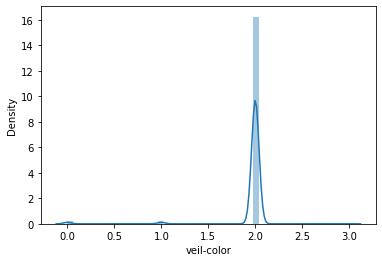

In [27]:
sns.distplot(df['veil-color'])

<AxesSubplot:xlabel='gill-spacing', ylabel='Density'>

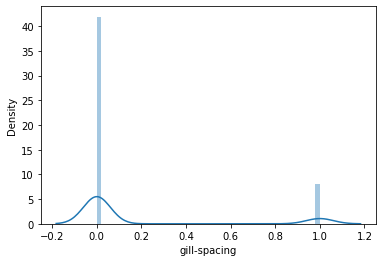

In [28]:
sns.distplot(df['gill-spacing'])

<AxesSubplot:xlabel='gill-attachment', ylabel='Density'>

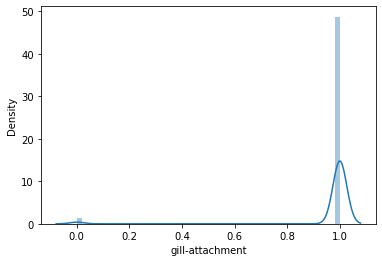

In [29]:
sns.distplot(df['gill-attachment'])

<AxesSubplot:xlabel='ring-number', ylabel='Density'>

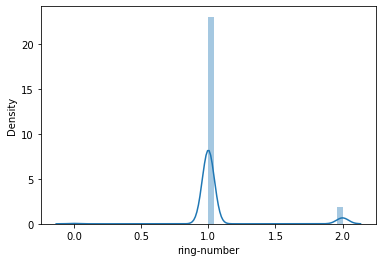

In [30]:
sns.distplot(df['ring-number'])

In [31]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [32]:
df.skew().sort_values(ascending=False)

ring-number                 2.701657
gill-spacing                1.840088
habitat                     0.985548
stalk-root                  0.947852
gill-size                   0.825797
cap-color                   0.706965
spore-print-color           0.548426
bruises                     0.342750
class                       0.071946
gill-color                  0.061410
odor                       -0.080790
cap-shape                  -0.247052
stalk-shape                -0.271345
ring-type                  -0.290018
cap-surface                -0.590859
stalk-surface-below-ring   -0.757703
stalk-surface-above-ring   -1.098739
population                 -1.413096
stalk-color-below-ring     -1.791593
stalk-color-above-ring     -1.835434
gill-attachment            -5.977076
veil-color                 -6.946944
dtype: float64

In [33]:
x=df.drop(['class'],axis=1)
y=df['class']

In [34]:
x.shape

(8124, 21)

In [35]:
y.shape

(8124,)

In [36]:
x.shape,y.shape

((8124, 21), (8124,))

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [41]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6093, 21), (6093,), (2031, 21), (2031,))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
lr=LogisticRegression()

In [44]:
dt=DecisionTreeClassifier()

In [45]:
knn=KNeighborsClassifier()

In [46]:
rfc=RandomForestClassifier()

In [47]:
lr.fit(x_train,y_train)

LogisticRegression()

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
lr.score(x_test,y_test)

0.9551944854751354

In [52]:
dt.score(x_test,y_test)

1.0

In [53]:
knn.score(x_test,y_test)

1.0

In [54]:
rfc.score(x_test,y_test)

1.0

In [55]:
y_pred_lr=lr.predict(x_test)

In [56]:
y_pred_dt=dt.predict(x_test)

In [57]:
y_pred_knn=knn.predict(x_test)

In [58]:
y_pred_rfc=rfc.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

In [60]:
#accuracy score by Logistic Regression

In [61]:
accuracy_score(y_test,y_pred_lr)

0.9551944854751354

In [62]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1040
           1       0.95      0.96      0.95       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [63]:
print(confusion_matrix(y_test,y_pred_lr))

[[987  53]
 [ 38 953]]


In [64]:
print(1 - metrics.accuracy_score(y_test, y_pred_lr))

0.04480551452486459


In [65]:
#accuracy score by DecisionTree Regression

In [66]:
accuracy_score(y_test,y_pred_dt)

1.0

In [67]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [68]:
print(confusion_matrix(y_test,y_pred_dt))

[[1040    0]
 [   0  991]]


In [69]:
#classification error
print(1 - metrics.accuracy_score(y_test, y_pred_dt))

0.0


In [70]:
#accuracy score by Knn Regression

In [71]:
accuracy_score(y_test,y_pred_knn)

1.0

In [72]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [73]:
print(confusion_matrix(y_test,y_pred_knn))

[[1040    0]
 [   0  991]]


In [74]:
#accuracy score byRandom Forest Regression

In [75]:
accuracy_score(y_test,y_pred_rfc)

1.0

In [76]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [77]:
print(confusion_matrix(y_test,y_pred_rfc))

[[1040    0]
 [   0  991]]


In [78]:
cross_val_score(dt,x_scaled,y,cv=5)

array([0.88184615, 1.        , 0.99753846, 1.        , 0.66009852])

In [79]:
cross_val_score(dt,x_scaled,y,cv=5).mean()

0.9182417582417581

In [80]:
cross_val_score(knn,x_scaled,y,cv=5)

array([0.84246154, 1.        , 0.95015385, 1.        , 0.60591133])

In [81]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8797053429329292

In [82]:
cross_val_score(lr,x_scaled,y,cv=5)

array([0.67876923, 0.98215385, 0.87569231, 0.99815385, 0.61576355])

In [83]:
cross_val_score(lr,x_scaled,y,cv=5).mean()

0.8301065555134521

In [84]:
cross_val_score(rfc,x_scaled,y,cv=5)

array([0.84246154, 1.        , 1.        , 1.        , 0.63485222])

In [85]:
cross_val_score(rfc,x_scaled,y,cv=5).mean()

0.88339378552482

In [86]:
from sklearn.metrics import plot_roc_curve

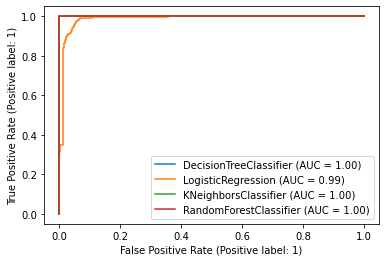

In [87]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

#decision tree works better here than logistic regression,random forest,knn

In [255]:
# comparing actual values with predicted values

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
actual_vs_pred .sample(5)

,Actual,Predicted
1897,0,0
624,0,0
7019,0,0
5040,1,1
3955,1,1
